In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm
import sys
import matplotlib
import seaborn as sns

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


# Import Data

In [3]:
ticker_df = pd.read_csv('../data/taq/56bb9b959bbe275b_csv.zip', nrows = 1000)

In [2]:
## Read in all files from TAQ

# Fix forward/backslashes in directory name
taq_folder = '../data/taq/'
if sys.platform != 'linux':
    taq_folder = taq_folder.replace('/', '\\')
print(f'Reading data from: {taq_folder}')

# Read files
taq_files = [x[2] for x in os.walk(taq_folder)][0]
ticker_df = pd.concat([pd.read_csv(taq_folder + taq_file) for taq_file in taq_files])

Reading data from: ../data/taq/


KeyboardInterrupt: 

In [49]:
# Concatenated file info
print('Tickers: ' + ', '.join(ticker_df['SYM_ROOT'].unique()))
print('Dates: ' + ', '.join(np.sort(ticker_df['DATE'].astype(str).unique())))

ticker_df.head()

Tickers: ANGL, HYG, HYLB, IGIB, IGSB, JNK, LQD, SHYG, SJNK, SLQD, SPIB, SPSB, USHY, USIG, VCIT, VCSH
Dates: 20200512, 20200513, 20200514, 20200515, 20200518, 20200519, 20200520, 20200521, 20200522, 20200526, 20200527, 20200528, 20200529, 20200601, 20200602, 20200603, 20200604, 20200605, 20200608, 20200609, 20200610, 20200611, 20200612, 20200615, 20200616, 20200617, 20200618, 20200619, 20200622, 20200623, 20200624, 20200625, 20200626, 20200629, 20200630, 20200701, 20200702, 20200706, 20200707, 20200708, 20200709, 20200710, 20200713, 20200714, 20200715, 20200716, 20200717, 20200720, 20200721, 20200722, 20200723


,DATE,TIME_M,EX,SYM_ROOT,SYM_SUFFIX,TR_SCOND,SIZE,PRICE,TR_CORR,TR_SEQNUM,TR_ID,TR_SOURCE,TR_RF
0,20200512,9:02:14.582082778,D,ANGL,NaN,@ TI,1,26.84,0,48688,1,N,Q
1,20200512,9:28:00.187942610,Q,ANGL,NaN,@ TI,50,27.82,0,64213,1,N,NaN
2,20200512,9:28:00.187946362,Q,ANGL,NaN,@ TI,50,27.82,0,64214,2,N,NaN
3,20200512,9:30:00.719399034,Q,ANGL,NaN,@O X,31699,27.05,0,68153,3,N,NaN
4,20200512,9:30:00.719524063,Q,ANGL,NaN,@ Q,31699,27.05,0,68154,4,N,NaN


# Clean Data

## Fix/Add columns

In [4]:
# Sort columns
ticker_df = ticker_df.sort_values(by = ['DATE'])
# Rename columns
ticker_df.rename(columns = {'SYM_ROOT': 'ticker', 'PRICE': 'price','SIZE':'size'}, inplace = True)

In [5]:
## Ticker Descriptions
# Long ticker descriptions
ticker_desc_dict = {
'VCIT':'Vanguard Intermediate-Term Corporate Bond ETF',
'HYG' :'iShares iBoxx High Yield Corporate Bond ETF',
'SLQD':'iShares 0-5 Year Investment Grade Corporate Bond ETF',
'VCSH':'Vanguard Short-Term Corporate Bond ETF',
'SPSB':'SPDR Portfolio Short Term Corporate Bond ETF',
'JNK' :'SPDR Bloomberg Barclays High Yield Bond ETF',
'USHY':'iShares Broad US Dollar High Yield Corporate Bond ETF',
'HYLB':'Xtrackers US Dollar High Yield Corporate Bond ETF',
'IGIB':'iShares Intermediate-Term Corporate Bond ETF',
'LQD' :'iShares iBoxx US Dollar Investment Grade Corporat,e Bond ETF',
'SHYG':'iShares 0-5 Year High Yield Corporate Bond ETF',
'USIG':'iShares Broad US Dollar Investment Grade Corporate Bond ETF',
'IGSB':'iShares Short-Term Corporate Bond ETF',
'ANGL':'VanEck Vectors Fallen Angel High Yield Bond ETF',
'SPIB':'SPDR Portfolio Intermediate Term Corporate Bond ETF',
'SJNK' :'SPDR Bloomberg Barclays Short Term High Yield Bond ETF'
}

ticker_df["ticker_desc"] = ticker_df["ticker"].apply(lambda x: ticker_desc_dict.get(x, "NA"))

In [6]:
# Convert date and time info to pandas datetime
ticker_df["datetime"] = pd.to_datetime(ticker_df['DATE'].astype(str) + ' ' + ticker_df['TIME_M'])
ticker_df['date'] = (ticker_df['datetime'].dt.date).astype(str)

# Ckeck Exchange Data

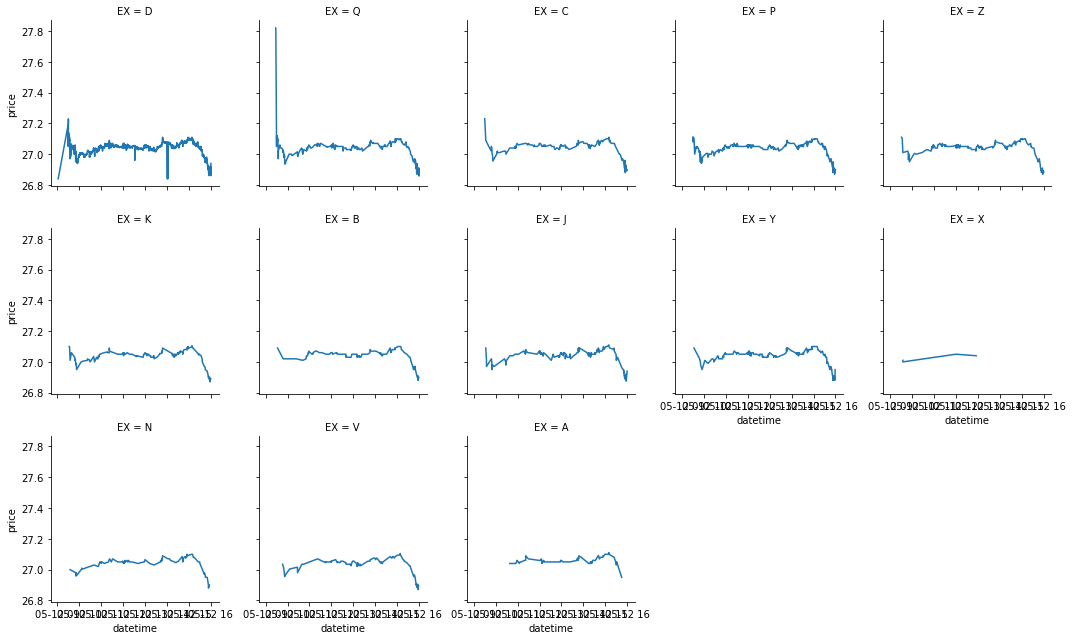

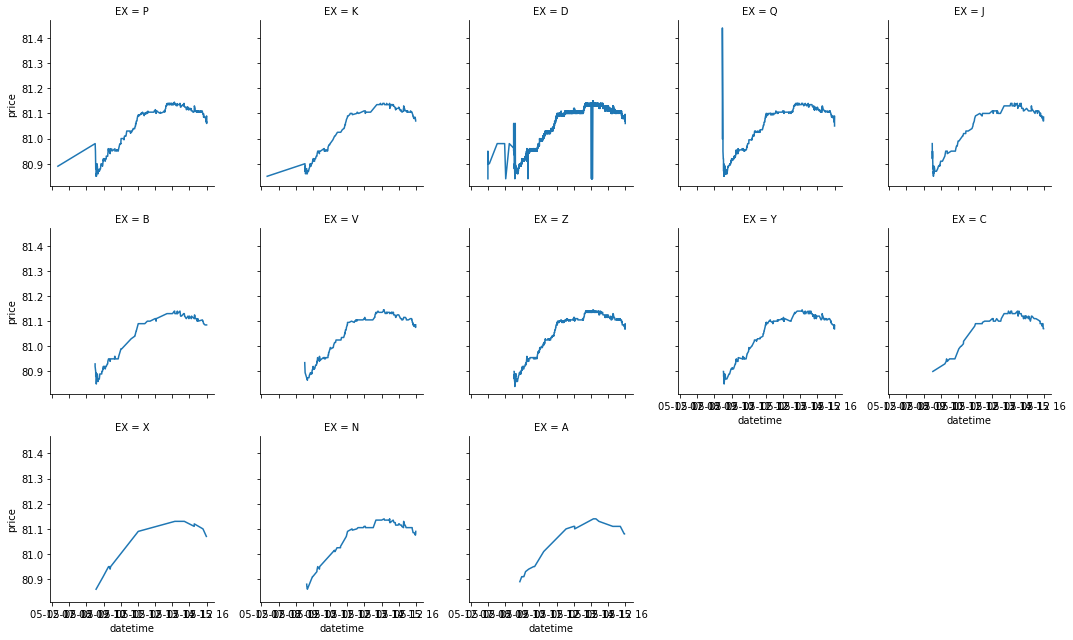

In [53]:
ordered_tickers=ticker_df.query("date=='2020-05-12'")['ticker'].unique()[0:2]
for ticker in ordered_tickers:
    temp_df=ticker_df.query("date == '2020-05-12' & ticker == @ticker").sort_values(by='datetime').copy()
    g = sns.FacetGrid(temp_df, col = 'EX', col_wrap = 5)
    g = g.map(plt.plot, 'datetime', 'price')

In [54]:
# ## plot price for each exchange
# ordered_tickers=ticker_df.query("date=='2020-05-12'")['ticker'].unique()
# for j in ordered_tickers:
#     ex_tickers=np.sort(ticker_df.query("ticker==@j and date=='2020-05-12'")['EX'].unique())
#     fig, ax = plt.subplots(figsize=(12, 20),nrows=len(ex_tickers), ncols=1)
#     for i in range(len(ex_tickers)):
#         ex = ex_tickers[i]
#         ax = plt.subplot(len(ex_tickers), 1,1+i)
#         plot_data = ticker_df.query("EX == @ex and date=='2020-05-12'and ticker==@j").sort_values(by='datetime')
#         plot_data.plot(x='datetime', y="price", ax=ax)
#         ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=15))
       
#         plt.title(ex,fontdict = {'fontsize':15})
#         plt.xlabel("datetime")
#         plt.ylabel("price")
#     plt.savefig("../exhibits/price_ex_{}.png".format(j), dpi=300)

In [55]:
# Drop weird exchange
ticker_df = ticker_df.query('EX != "D"').copy()

In [56]:
# pick useful columns
ticker_df=ticker_df[['ticker','ticker_desc','date','datetime','price','size']].copy().sort_values(by = ['datetime'])

In [57]:
ticker_df.head()

,ticker,ticker_desc,date,datetime,price,size
243624,HYG,iShares iBoxx High Yield Corporate Bond ETF,2020-05-12,2020-05-12 04:00:00.003338509,80.98,700
7931671,LQD,iShares iBoxx US Dollar Investment Grade Corpo...,2020-05-12,2020-05-12 04:00:00.020569804,126.02,900
7931672,LQD,iShares iBoxx US Dollar Investment Grade Corpo...,2020-05-12,2020-05-12 04:01:07.383316176,126.02,100
243625,HYG,iShares iBoxx High Yield Corporate Bond ETF,2020-05-12,2020-05-12 04:03:57.336681434,80.25,100
243626,HYG,iShares iBoxx High Yield Corporate Bond ETF,2020-05-12,2020-05-12 04:08:11.430617241,80.20,100


# Resample prices

In [46]:
def resample_data(data,sampling_freq="5s"):
    # Fix datetime type
    data['datetime']=pd.to_datetime(data['datetime'])
    data=data.sort_values(by=["ticker", "date", "datetime"])
    
    # Resample on a given basis
    resample=(
    data.set_index("datetime")
    .groupby(["ticker", "ticker_desc", "date"])
    .resample(sampling_freq, label = 'right')["price"]
    .last()
    .reset_index().copy()
    )
    
    # Forward fill missing prices for particular intervals using last observed price
    resample["price"] = (
    resample.sort_values(by="datetime")
    .groupby(["ticker", "ticker_desc", "date"])["price"]
    .fillna(method="ffill")
    )
    
    # Add returns
    resample = resample.sort_values(by=["ticker", "date", "datetime"])
    resample["log_price"] = np.log(resample["price"])
    resample["return"] = resample.groupby(["ticker", "date"])["log_price"].diff(1).fillna(0)
    
    return resample

In [47]:
ticker_5s_df=resample_data(ticker_df,sampling_freq="5s")

In [48]:
ticker_1s_df=resample_data(ticker_df,sampling_freq="1s")

In [45]:
ticker_1s_df.query('date == "2020-05-12" and ticker == "ANGL"').iloc[590:610].set_index('datetime').resample('5s', label = 'right')['price'].last()

datetime
2020-05-12 09:39:55    27.05
2020-05-12 09:40:00    27.05
2020-05-12 09:40:05    27.04
2020-05-12 09:40:10    27.05
Freq: 5S, Name: price, dtype: float64

In [49]:
ticker_1s_df.query('date == "2020-05-12" and ticker == "ANGL"').iloc[590:610]

,ticker,ticker_desc,date,datetime,price,log_price,return
590,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:51,27.055,3.297872,0.000000
591,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:52,27.050,3.297687,-0.000185
592,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:53,27.050,3.297687,0.000000
593,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:54,27.050,3.297687,0.000000
594,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:55,27.050,3.297687,0.000000
595,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:56,27.050,3.297687,0.000000
596,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:57,27.050,3.297687,0.000000
597,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:58,27.050,3.297687,0.000000
598,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:59,27.050,3.297687,0.000000
599,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:40:00,27.050,3.297687,0.000000


In [40]:
ticker_df.query('date == "2020-05-12" and ticker == "ANGL"').sort_values(by="datetime")[
    ["ticker", "datetime", "price"]
].iloc[230:250]

,ticker,datetime,price
230,ANGL,2020-05-12 09:39:21.933566802,27.0400
231,ANGL,2020-05-12 09:39:38.197478030,27.0550
232,ANGL,2020-05-12 09:39:51.565850485,27.0500
233,ANGL,2020-05-12 09:40:02.164294116,27.0400
234,ANGL,2020-05-12 09:40:06.223641881,27.0500
235,ANGL,2020-05-12 09:40:11.790898072,27.0500
236,ANGL,2020-05-12 09:40:11.831573622,27.0500
237,ANGL,2020-05-12 09:40:44.878597749,27.0481
238,ANGL,2020-05-12 09:40:50.637346474,27.0400
239,ANGL,2020-05-12 09:41:08.399774230,27.0490


In [50]:
ticker_5s_df.query('date == "2020-05-12" and ticker == "ANGL"').iloc[110:130]

,ticker,ticker_desc,date,datetime,price,log_price,return
110,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:15,27.0600,3.298057,0.000000
111,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:20,27.0600,3.298057,0.000000
112,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:25,27.0400,3.297317,-0.000739
113,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:30,27.0400,3.297317,0.000000
114,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:35,27.0400,3.297317,0.000000
115,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:40,27.0550,3.297872,0.000555
116,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:45,27.0550,3.297872,0.000000
117,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:50,27.0550,3.297872,0.000000
118,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:39:55,27.0500,3.297687,-0.000185
119,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-05-12,2020-05-12 09:40:00,27.0500,3.297687,0.000000


In [61]:
ticker_df.to_csv('../data/clean/ticker.csv', index = False)
ticker_1s_df.to_csv('../data/clean/ticker_1s.csv', index = False)
ticker_5s_df.to_csv('../data/clean/ticker_5s.csv', index = False)